# Survey Analysis

The survey dataset we’ll be working with can be found here. Spend some time exploring the dataset — 
- **DONE** Which demographic groups are respesented in the data?
- **DONE** Compute and plot the demographic distributions
- **DONE** Is there missingness in the collected data?
- Analyze the (unadjusted) answers for the substantive questions.

Write a Python script (called survey_analysis.py) to analyze the responses. Compute and plot the demographic distributions, and analyze the (unadjusted) answers for the substantive questions.

## Import Packages

In [1]:
import pandas as pd
import numpy as np
from textwrap import wrap

## Load in Data

In [2]:
survey_df = pd.read_csv('comma-survey.csv', index_col='RespondentID')

In [3]:
# Extract question and demographics columns
question_cols = list(survey_df.columns)[:7]
demographic_cols = list(survey_df.columns)[7:]

In [4]:
# Create Categories for sorting
survey_df[question_cols[2]] = pd.Categorical(survey_df[question_cols[2]], 
                                 ['A lot',
                                  'Some',
                                  'Not much',
                                  'Not at all'])
# Create Categories for sorting
survey_df[question_cols[5]] = pd.Categorical(survey_df[question_cols[5]], 
                                 ['A lot',
                                  'Some',
                                  'Not much',
                                  'Not at all'])
survey_df['Age'] = pd.Categorical(survey_df['Age'],
                                 ['> 60',
                                  '45-60',
                                  '30-44',
                                  '18-29'])
survey_df['Education'] = pd.Categorical(survey_df['Education'], 
                                 ['Graduate degree',
                                  'Bachelor degree',
                                  'Some college or Associate degree',
                                  'High school degree',
                                  'Less than high school degree'])
survey_df['Household Income'] = pd.Categorical(survey_df['Household Income'], 
                                 ['$0 - $24,999',
                                  '$25,000 - $49,999',
                                  '$50,000 - $99,999',
                                  '$100,000 - $149,999',
                                  '$150,000+'])

## Compute Descriptive Statistics

In [5]:
n_obs = len(survey_df)
n_features = len(survey_df.columns)
print('The data set has {} observations and {} features'.format(n_obs, n_features))

The data set has 1129 observations and 12 features


### Missing Data Overall

In [6]:
# Count of missing values per question across entire dataset
survey_df.isna().sum()

In your opinion, which sentence is more gramatically correct?                                                               0
Prior to reading about it above, had you heard of the serial (or Oxford) comma?                                            30
How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?               30
How would you write the following sentence?                                                                                36
When faced with using the word "data", have you ever spent time considering if the word was a singular or plural noun?     38
How much, if at all, do you care about the debate over the use of the word "data" as a singluar or plural noun?            38
In your opinion, how important or unimportant is proper use of grammar?                                                    70
Gender                                                                                                                

In [7]:
# Count rows where at least one question is not answered
one_na_all_questions = survey_df.isna().any(axis=1).sum()
# Count rows where at least one of the substantive questions is not answered
one_na_susbstantive = survey_df[question_cols].isna().any(axis=1).sum()
# Count rows where all the demographic questions were unanswered
all_na_demographic = survey_df[demographic_cols].isna().all(axis=1).sum()
# Count rows where at least one of the substantive questions is unanswered but a demographic question is answered
na_substantive_demographic = survey_df[survey_df[question_cols].isna().any(axis=1)].iloc[:,7:11].notnull().any(axis=1).sum()
# Column with the most missing values
most_missing = survey_df.count().idxmin()
most_missing_count = survey_df[most_missing].isna().sum()

print('Number of rows with any question unanswered: {} ({} of all observations)'.format(
    one_na_all_questions, '{:,.2%}'.format(one_na_all_questions/n_obs)))
print()
print('Column with the most missing values: {}, {} missing values ({} of all observations)'.format(
    most_missing, most_missing_count, '{:,.2%}'.format(most_missing_count/n_obs)))
print()
print('Number of rows with at least one substantive question unanswered: {} ({} of all observations)'.format(
    one_na_susbstantive, '{:,.2%}'.format(one_na_susbstantive/n_obs)))
print('Number of the {} aforementioned rows with at least one demographic question answered: {} ({})'.format(
    one_na_susbstantive, na_substantive_demographic, '{:,.2%}'.format(na_substantive_demographic/one_na_susbstantive)))
print()
print('Number of rows where all demographic questions are unanswered: {} ({}% of observations)'.format(
    all_na_demographic, '{:,.2%}'.format(all_na_demographic/n_obs)))

Number of rows with any question unanswered: 304 (26.93% of all observations)

Column with the most missing values: Household Income, 293 missing values (25.95% of all observations)

Number of rows with at least one substantive question unanswered: 74 (6.55% of all observations)
Number of the 74 aforementioned rows with at least one demographic question answered: 4 (5.41%)

Number of rows where all demographic questions are unanswered: 92 (8.15%% of observations)


There is some mixing in which respondents have missing data in columns, i.e., the question with the maximum missingness does not give the total of rows in our data with missing data. The total number of rows with some degree of missingness constitutes around 27\% of our observations.

### Demographic Distributions

#### Which groups are present in the data

In [8]:
demographic_options = []
for d in demographic_cols:
    demographic_options.append(survey_df[d].unique())
demographic_options = [list(x) for x in demographic_options]
print('Demographic groups present in the data:', *demographic_options, sep='\n')

Demographic groups present in the data:
['Male', nan, 'Female']
['30-44', '18-29', nan, '> 60', '45-60']
['$50,000 - $99,999', nan, '$25,000 - $49,999', '$0 - $24,999', '$150,000+', '$100,000 - $149,999']
['Bachelor degree', 'Graduate degree', nan, 'Less than high school degree', 'Some college or Associate degree', 'High school degree']
['South Atlantic', 'Mountain', 'East North Central', 'Middle Atlantic', nan, 'New England', 'Pacific', 'East South Central', 'West North Central', 'West South Central']


#### Overall Gender Distribution

Gender Distribution:
Female   48.54%
Male     43.31%
NaN       8.15%
92 respondents did not disclose Gender
70 of those respondents also did not answer at least one of the sustantive questions


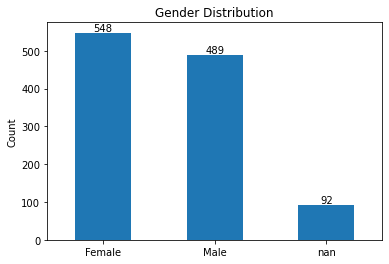

In [9]:
col_7 = survey_df.iloc[:,7].value_counts(dropna=False)
sustantive_vs_7 = survey_df[survey_df[question_cols].isna().any(axis=1)].iloc[:,7].isna().sum()
print(col_7.name, 'Distribution:')
print(col_7.div(n_obs).to_string(header=False, float_format='{:,.2%}'.format))
print('{} respondents did not disclose {}'.format(survey_df.iloc[:,7].isna().sum(), col_7.name))
print('{} of those respondents also did not answer at least one of the sustantive questions'.format(sustantive_vs_7))
plt_7 = col_7.plot.bar(title=col_7.name + ' Distribution', ylabel="Count", rot=0)
for container in plt_7.containers:
    plt_7.bar_label(container)

Takeaways; We have slightly more females than males in the survey.

#### Overall Age Distribution

Age Distribution:
> 60    24.09%
45-60   25.69%
30-44   22.50%
18-29   19.57%
NaN      8.15%
92 respondents did not disclose Age
0 respondents who did not disclose Gender disclosed Age


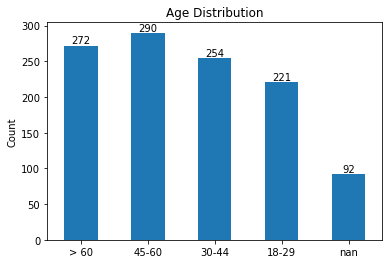

In [10]:
survey_df.sort_values('Age')
col_8 = survey_df.iloc[:,8].value_counts(dropna=False, sort=False)
print(col_8.name, 'Distribution:')
print(col_8.div(n_obs).to_string(header=False, float_format='{:,.2%}'.format))
print('{} respondents did not disclose {}'.format(survey_df.iloc[:,8].isna().sum(), col_8.name))
print('{} respondents who did not disclose {} disclosed {}'.format(
    survey_df[survey_df.iloc[:,7].isna()].iloc[:,8].notnull().sum(), col_7.name, col_8.name))
plt_8 = col_8.plot.bar(title=col_8.name + ' Distribution', ylabel="Count", rot=0)
for container in plt_8.containers:
    plt_8.bar_label(container)

Everyone who stated their gender also stated their age group. The number of respondents increases slightly with age group. 

#### Overall Household Income Distribution

Household Income Distribution:
$0 - $24,999          10.72%
$25,000 - $49,999     13.99%
$50,000 - $99,999     25.69%
$100,000 - $149,999   14.53%
$150,000+              9.12%
NaN                   25.95%
293 respondents did not disclose Household Income


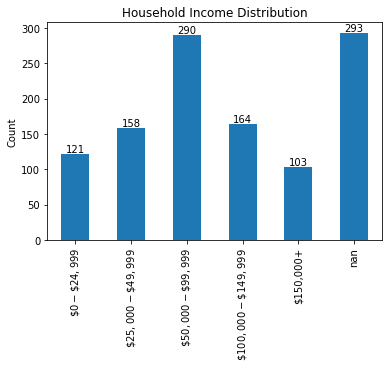

In [11]:
survey_df.sort_values('Household Income')
col_9 = survey_df.iloc[:,9].value_counts(dropna=False, sort=False)
print(col_9.name, 'Distribution:')
print(col_9.div(n_obs).to_string(header=False, float_format='{:,.2%}'.format))
print('{} respondents did not disclose {}'.format(survey_df.iloc[:,9].isna().sum(), col_9.name))
col_9.rename(index={'$0 - $24,999': '$\$0 - \$24,999$',
                    '$25,000 - $49,999':'$\$25,000 - \$49,999$',
                    '$50,000 - $99,999': '$\$50,000 - \$99,999$',
                    '$100,000 - $149,999': '$\$100,000 - \$149,999$'}, inplace=True)
plt_9 = col_9.plot.bar(title=col_9.name + ' Distribution', ylabel="Count")
for container in plt_9.containers:
    plt_9.bar_label(container)

The biggest income group is $\$50,000$ to $\$99,999$, and the smallest two groups are given by the two most extreme groups ($\$0$ to $\$24,999$ and $\$150,000+$). What's notable is that the number of missing values has more than tripled compared to previous question, indicating that a substantial portion of respondents did not (want to) answer a question about their household income.

#### Overall Education Distribution

Education Distribution:
Graduate degree                    24.45%
Bachelor degree                    30.47%
Some college or Associate degree   26.13%
High school degree                  8.86%
Less than high school degree        0.97%
NaN                                 9.12%
103 respondents did not disclose Education


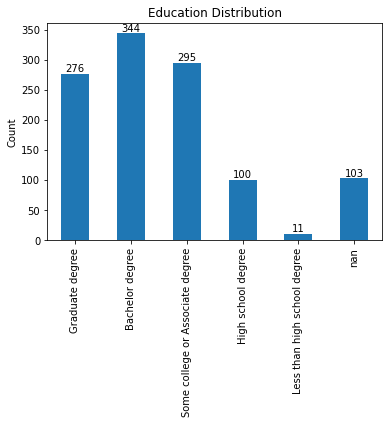

In [12]:
survey_df.sort_values('Education')
col_10 = survey_df.iloc[:,10].value_counts(dropna=False, sort=False)
print(col_10.name, 'Distribution:')
print(col_10.div(n_obs).to_string(header=False, float_format='{:,.2%}'.format))
print('{} respondents did not disclose {}'.format(survey_df.iloc[:,10].isna().sum(), col_10.name))
plt_10 = col_10.plot.bar(title=col_10.name + ' Distribution', ylabel="Count")
for container in plt_10.containers:
    plt_10.bar_label(container)

The biggest education group is those having a Bachelor degree, whereas only a small portion of respondents has just a high school degree or less. It is interesting to see that although the previous (income) question had 293 missing values, this question has only 103 missing values.

#### Overall Location Distribution

Location (Census Region) Distribution:
South Atlantic       14.53%
Mountain              7.71%
East North Central   15.06%
Middle Atlantic      12.40%
NaN                   9.03%
New England           6.47%
Pacific              15.94%
East South Central    3.81%
West North Central    7.26%
West South Central    7.79%
102 respondents did not disclose Location (Census Region)


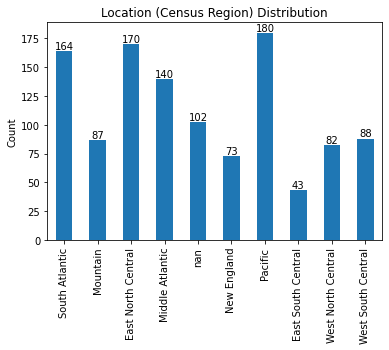

In [13]:
col_11 = survey_df.iloc[:,11].value_counts(dropna=False, sort=False)
print(col_11.name, 'Distribution:')
print(col_11.div(n_obs).to_string(header=False, float_format='{:,.2%}'.format))
print('{} respondents did not disclose {}'.format(survey_df.iloc[:,11].isna().sum(), col_11.name))
plt_11 = col_11.plot.bar(title=col_11.name + ' Distribution', ylabel="Count")
for container in plt_11.containers:
    plt_11.bar_label(container)

We have the same number of missing values as last column. The largest location groups are 'Pacific', 'East North Central', 'South Atlantic', and 'Middle Atlantic'. 

#### Bivariate plots

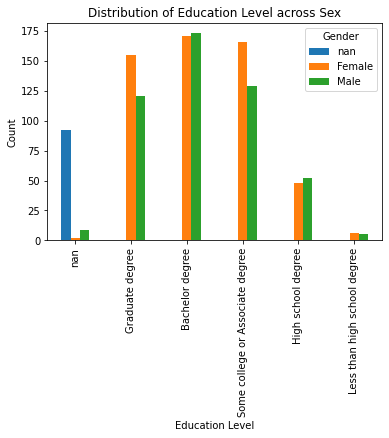

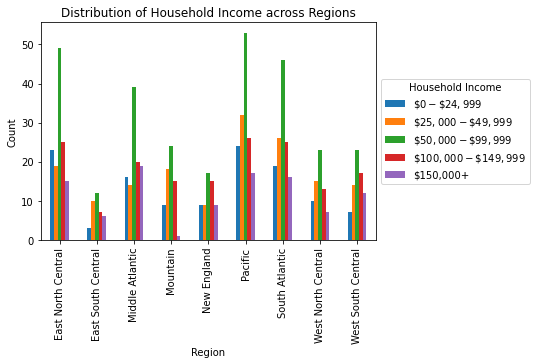

In [14]:
# Education and Sex
survey_df.sort_values('Education')
edu_sex = survey_df.groupby(['Education', 'Gender'], dropna=False).size().unstack(fill_value=0).plot(kind='bar', title='Distribution of Education Level across Sex', ylabel='Count', xlabel='Education Level')
# Location and Income
survey_df.sort_values('Household Income')
loc_hi = survey_df.groupby(['Location (Census Region)', 'Household Income']).size().unstack(fill_value=0)
loc_hi.rename(columns={'$0 - $24,999': '$\$0 - \$24,999$',
                    '$25,000 - $49,999':'$\$25,000 - \$49,999$',
                    '$50,000 - $99,999': '$\$50,000 - \$99,999$',
                    '$100,000 - $149,999': '$\$100,000 - \$149,999$'}, inplace=True)
loc_hi.plot(kind='bar', title='Distribution of Household Income across Regions', ylabel='Count', xlabel='Region').legend(title='Household Income', loc='center left', bbox_to_anchor=(1.0, 0.5))


### Substantive Question Level Distributions

#### Question 1: Oxford comma sentence example

Q1: In your opinion, which sentence is more gramatically correct?
It's important for a person to be honest, kind, and loyal.   56.78%
It's important for a person to be honest, kind and loyal.    43.22%
Q1 has 0 missing values


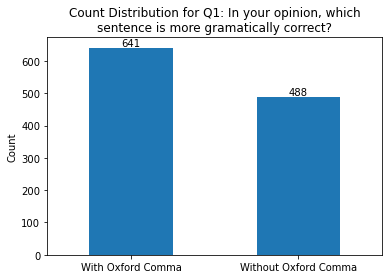

In [15]:
col_0 = survey_df.iloc[:,0].value_counts(dropna=False)
print('Q1:', col_0.name)
print(col_0.div(n_obs).to_string(header=False, float_format='{:,.2%}'.format))
print('Q1 has {} missing values'.format(survey_df.iloc[:,0].isna().sum()))
col_0.rename(index={'It\'s important for a person to be honest, kind, and loyal.': 'With Oxford Comma',
                    'It\'s important for a person to be honest, kind and loyal.': 'Without Oxford Comma'},
             inplace=True)
plt_0 = col_0.plot.bar(title='\n'.join(wrap('Count Distribution for Q1: ' + col_0.name, 50)), ylabel="Count", rot=0)
for container in plt_0.containers:
    plt_0.bar_label(container)

#### Question 2: Prior knowledge of Oxford comma

Q2: Prior to reading about it above, had you heard of the serial (or Oxford) comma?
Yes   58.02%
No    39.33%
NaN    2.66%
Q2 has 30 missing values


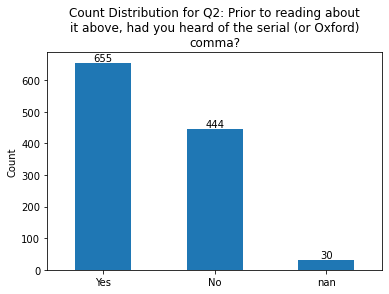

In [16]:
col_1 = survey_df.iloc[:,1].value_counts(dropna=False)
print('Q2:', col_1.name)
print(col_1.div(n_obs).to_string(header=False, float_format='{:,.2%}'.format))
print('Q2 has {} missing values'.format(survey_df.iloc[:,1].isna().sum()))
plt_1 = col_1.plot.bar(title='\n'.join(wrap('Count Distribution for Q2: ' + col_1.name, 50)), ylabel="Count", rot=0)
for container in plt_1.containers:
    plt_1.bar_label(container)

#### Question 3: Level of investment in usage of the Oxford comma

Q3: How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?
A lot        25.78%
Some         36.67%
Not much     23.74%
Not at all   11.16%
NaN           2.66%
Q3 has 30 missing values


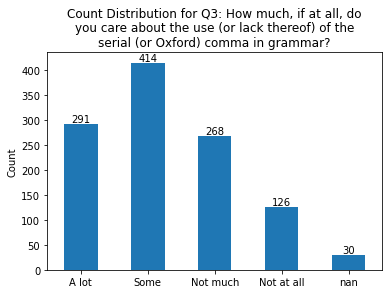

In [17]:
col_2 = survey_df.iloc[:,2].value_counts(sort=False, dropna=False)
print('Q3:', col_2.name)
print(col_2.div(n_obs).to_string(header=False, float_format='{:,.2%}'.format))
print('Q3 has {} missing values'.format(survey_df.iloc[:,2].isna().sum()))
plt_2 = col_2.plot.bar(title='\n'.join(wrap('Count Distribution for Q3: ' + col_2.name, 50)), ylabel="Count", rot=0)
for container in plt_2.containers:
    plt_2.bar_label(container)

#### Question 1 and 2: Use of the Oxford comma given prior knowledge

Response distribution for Q1 given if the person previously knew of the Oxford comma or not
No  It's important for a person to be honest, kind and loyal.  54.95%
    It's important for a person to be honest, kind, and loyal. 45.05%
Yes It's important for a person to be honest, kind, and loyal. 64.58%
    It's important for a person to be honest, kind and loyal.  35.42%
NaN It's important for a person to be honest, kind, and loyal. 60.00%
    It's important for a person to be honest, kind and loyal.  40.00%


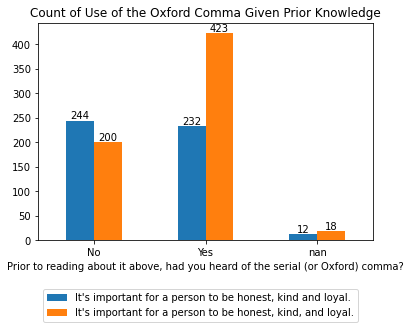

In [18]:
# Table
col_0_given_1 = survey_df[question_cols[:2]].groupby(question_cols[1], dropna=False).value_counts(normalize=True)
print('Response distribution for Q1 given if the person previously knew of the Oxford comma or not')
print(col_0_given_1.to_frame().to_string(header=False, index_names=False, float_format='{:,.2%}'.format))
# Plot
col_0g1 = survey_df[question_cols[:2]].groupby(question_cols[1], dropna=False).value_counts()
plt_01 = col_0g1.unstack().plot.bar(title='Count of Use of the Oxford Comma Given Prior Knowledge', rot=0)
plt_01.legend(loc='center left', bbox_to_anchor=(0, -0.3))
for container in plt_01.containers:
    plt_01.bar_label(container)

Takeaway; among people who know about the Oxford comma, more people choose the correct sentence in the first column (the one that has the serial comma inside). Furthermore, every respondent has entered the first column in the survey, whereas 30 people have not entered a response for column 2. 

#### Question 2 and 3: Level of investment in usage of the Oxford comma given prior knowledge

0 respondents who did not answer question Q3 answered Q2

Response distribution for Q3 given if the person previously knew of the Oxford comma or not
No  A lot      13.96%
    Some       38.51%
    Not much   28.60%
    Not at all 18.92%
Yes A lot      34.96%
    Some       37.10%
    Not much   21.53%
    Not at all  6.41%


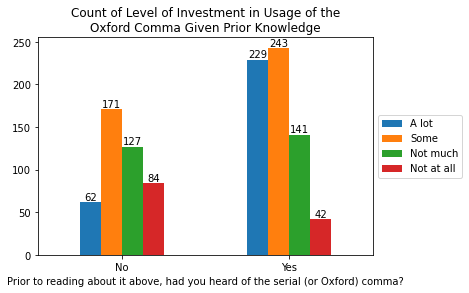

In [19]:
answered_Q3_not_Q2 = survey_df[survey_df.iloc[:,2].isna()].iloc[:,1].value_counts()
print('{} respondents who did not answer question Q3 answered Q2\n'.format(len(answered_Q3_not_Q2)))
# Table
col_2_given_1 = survey_df[question_cols[1:3]].groupby(question_cols[1]).value_counts(normalize=True)
print('Response distribution for Q3 given if the person previously knew of the Oxford comma or not')
print(col_2_given_1.to_frame().sort_values(question_cols[1:3]).to_string(header=False, index_names=False, float_format='{:,.2%}'.format))
# Plot
col_2g1 = survey_df[question_cols[1:3]].groupby(question_cols[1]).value_counts()
plt_21 = col_2g1.unstack().plot.bar(title='\n'.join(wrap(
    'Count of Level of Investment in Usage of the Oxford Comma Given Prior Knowledge', 50)), rot=0)
plt_21.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in plt_21.containers:
    plt_21.bar_label(container)

Takeaway; the third column has as many missing values as the second column. The 30 respondents are the same across these two columns, implying that no-one who did not answer the second survey question did answer the third question. 

Among people who do not know about the Oxford comma, a larger fraction does not care about the use of this concept in grammar than the same fraction among people who do about this concept.

#### Questions 1 and 3: Level of investment in usage of the Oxford Comma given whether the respondent used it

Response distribution for Q3 given if the person previously knew of the Oxford comma or not
It's important for a person to be honest, kind and loyal.  A lot      13.73%
                                                           Some       34.22%
                                                           Not much   31.56%
                                                           Not at all 18.03%
                                                           nan         2.46%
It's important for a person to be honest, kind, and loyal. A lot      34.95%
                                                           Some       38.53%
                                                           Not much   17.78%
                                                           Not at all  5.93%
                                                           nan         2.81%


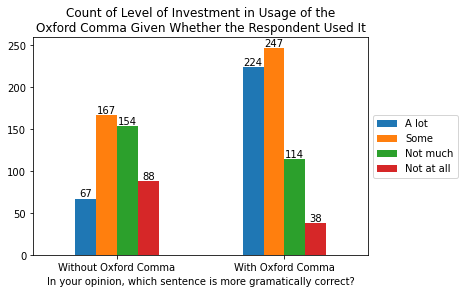

In [20]:
col_02 = [question_cols[0], question_cols[2]]
# Table
col_2_given_0 = survey_df[col_02].groupby(question_cols[0]).value_counts(normalize=True, dropna=False)
print('Response distribution for Q3 given if the person previously knew of the Oxford comma or not')
print(col_2_given_0.to_frame().sort_values(col_02).to_string(header=False, index_names=False, float_format='{:,.2%}'.format))
# Plot
col_2g0 = survey_df.groupby(col_02).size().unstack(fill_value=0)
col_2g0.rename(index={'It\'s important for a person to be honest, kind, and loyal.': 'With Oxford Comma',
                        'It\'s important for a person to be honest, kind and loyal.': 'Without Oxford Comma'},
             inplace=True)
plt_20 = col_2g0.plot.bar(title='\n'.join(wrap(
    'Count of Level of Investment in Usage of the Oxford Comma Given Whether the Respondent Used It', 50)), rot=0)
plt_20.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in plt_20.containers:
    plt_20.bar_label(container)

Takeaway; more of the people who used the Oxford comma care about it's use than people who did not use it.

#### Question 4: Plurality of 'data' sentence example

Q4: How would you write the following sentence?
Some experts say it's important to drink milk, but the data is inconclusive.    76.62%
Some experts say it's important to drink milk, but the data are inconclusive.   20.19%
NaN                                                                              3.19%
Q4 has 36 missing values


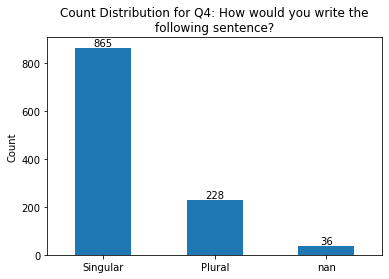

In [21]:
# Table
col_3 = survey_df.iloc[:,3].value_counts(dropna=False)
print('Q4:', col_3.name)
print(col_3.div(n_obs).to_string(header=False, float_format='{:,.2%}'.format))
print('Q4 has {} missing values'.format(survey_df.iloc[:,3].isna().sum()))
# Plot
col_3.rename(index={
    'Some experts say it\'s important to drink milk, but the data is inconclusive.': 'Singular',
    'Some experts say it\'s important to drink milk, but the data are inconclusive.': 'Plural'
}, inplace=True)
plt_3 = col_3.plot.bar(title='\n'.join(wrap('Count Distribution for Q4: ' + col_3.name, 50)),
                       ylabel="Count", rot=0)
for container in plt_3.containers:
    plt_3.bar_label(container)

Takeaways; Most people use singular when writing about data, and we have 6 extra missing responses compared to the previous two columns.

#### Question 5: Prior consideration of the plurality of 'data'

Q5: When faced with using the word "data", have you ever spent time considering if the word was a singular or plural noun?
No    48.45%
Yes   48.18%
NaN    3.37%
Q5 has 38 missing values


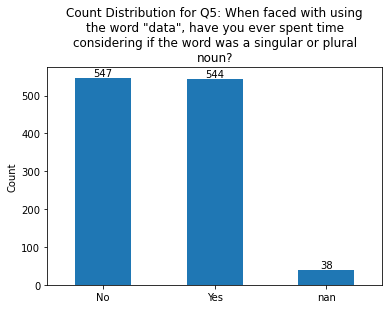

In [22]:
# Table
col_4 = survey_df.iloc[:,4].value_counts(dropna=False)
print('Q5:', col_4.name)
print(col_4.div(n_obs).to_string(header=False, float_format='{:,.2%}'.format))
print('Q5 has {} missing values'.format(survey_df.iloc[:,4].isna().sum()))
# Plot
plt_4 = col_4.plot.bar(title='\n'.join(wrap('Count Distribution for Q5: ' + col_4.name, 50)),
                       ylabel="Count", rot=0)
for container in plt_4.containers:
    plt_4.bar_label(container)

Takeaways; About half of the respondents has ever spent time considering whether data is singular or plural. Also, we have two more missing values compared to the previous column.

#### Question 6: Level of investment in the plurality of 'data'

Q6: How much, if at all, do you care about the debate over the use of the word "data" as a singluar or plural noun?
A lot        11.78%
Some         31.18%
Not much     35.70%
Not at all   17.98%
NaN           3.37%
Q6 has 38 missing values


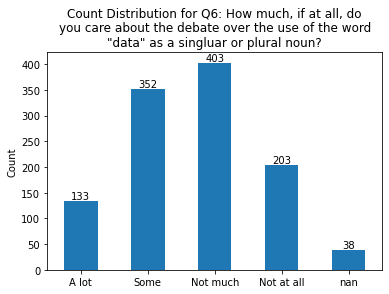

In [23]:
# Table
col_5 = survey_df.iloc[:,5].value_counts(sort=False, dropna=False)
print('Q6:', col_5.name)
print(col_5.div(n_obs).to_string(header=False, float_format='{:,.2%}'.format))
print('Q6 has {} missing values'.format(survey_df.iloc[:,5].isna().sum()))
# Plot
plt_5 = col_5.plot.bar(title='\n'.join(wrap('Count Distribution for Q6: ' + col_5.name, 50)),
                       ylabel="Count", rot=0)
for container in plt_5.containers:
    plt_5.bar_label(container)

Takeaways; The majority of people do not care all too much about the use of the word data. We have as many missing values as for the previous column.

### Columns 4-5-6 compared

Response distribution for Q1 given if the person previously knew of the Oxford comma or not
Some experts say it's important to drink milk, but the data are inconclusive. No  A lot       1.10%
                                                                                  Some        1.56%
                                                                                  Not much    1.47%
                                                                                  Not at all  0.83%
                                                                              Yes A lot       3.22%
                                                                                  Some        7.36%
                                                                                  Not much    4.69%
                                                                                  Not at all  0.46%
Some experts say it's important to drink milk, but the data is inconclusive.  No  A lot       2.58%
        

<AxesSubplot:xlabel='How would you write the following sentence?,When faced with using the word "data", have you ever spent time considering if the word was a singular or plural noun?'>

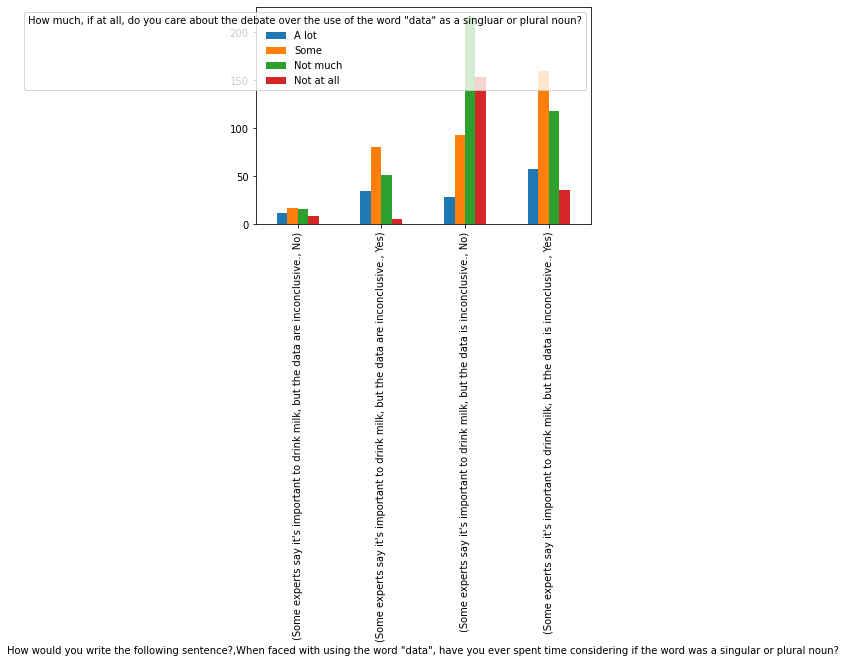

In [71]:
norm_col_456 = survey_df[question_cols[3:6]].value_counts(normalize=True, sort=False)
print('Response distribution for Q1 given if the person previously knew of the Oxford comma or not')
print(norm_col_456.to_frame().to_string(header=False, index_names=False, float_format='{:,.2%}'.format))
col_456 = survey_df[question_cols[3:6]].value_counts(sort=False).to_frame()[0]
col_456.to_frame().unstack()[0].plot.bar()
# plt_456s = col_456.unstack(level=[0]).plot.bar(title='\n'.join(wrap(
#     'idk rn', 50)), subplots=[(question_cols[4], question_cols[5])])
# for plt_456 in plt_456s:
#     plt_456.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#     for container in plt_456.containers:
#         plt_456.bar_label(container)

### Column 7

In [ ]:
survey_df.iloc[:,6].value_counts()

In [ ]:
print('The seventh column has {} missing values'.format(survey_df.iloc[:,6].isna().sum()))

Most people state they find proper use of grammar to be important. Also, we have almost double as many missing values for this question compared to the previous question.

In [ ]:
survey_df